In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import CleanData as CD

In [64]:
fsize = 15
lsize = 10
tdir = 'in'
major = 5.0
minor = 3.0
style = 'default'

plt.style.use(style)
# include to stop breaking dogx
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = lsize
plt.rcParams['xtick.direction'] = tdir
plt.rcParams['ytick.direction'] = tdir
plt.rcParams['xtick.major.size'] = major
plt.rcParams['xtick.minor.size'] = minor
plt.rcParams['ytick.major.size'] = major
plt.rcParams['ytick.minor.size'] = minor

also look at uncertainty on alpha

In [4]:
data_dir = "data\\filter_tests\\"

In [38]:
def get_Racc(integration_time, channel_1, channel_2):
    tau_c = 2e-8
    total_1_counts = np.sum(channel_1)
    total_2_counts = np.sum(channel_2)
    total_time_1 = integration_time * channel_1.shape[0]
    total_time_2 = integration_time * channel_2.shape[0]
    R1 = total_1_counts / total_time_1
    R2 = total_2_counts / total_time_2

    return tau_c * R1 * R2

In [39]:
def get_alpha(integration_time, channel_1, channel_2, CC):
    Racc = get_Racc(integration_time, channel_1, channel_2)
    total_CC = np.sum(CC)
    total_time_cc = integration_time * CC.shape[0]
    Rc = total_CC / total_time_cc
    return Rc / Racc



## LASER ON

In [40]:
filterless = data_dir + "3_4\\curr_filter\\filterless"
one_new_filter = data_dir + "3_4\\curr_filter\\new_fiter_front_only"
curr_filter = data_dir + "3_4\\with_curr_filter"
both_new_filter = data_dir + "3_6\\new_filter_bothpoints"

In [41]:
filterless_df, filterless_settings = CD.clean_csv(filterless)
curr_filter_df, curr_filter_settings = CD.clean_csv(curr_filter)
both_new_df, both_new_settings = CD.clean_csv(both_new_filter)

In [42]:
filterless_ch1 = filterless_df['Ch 1']
curr_filter_ch1 = curr_filter_df['Ch 1']
both_new_ch1 = both_new_df['Ch 1']

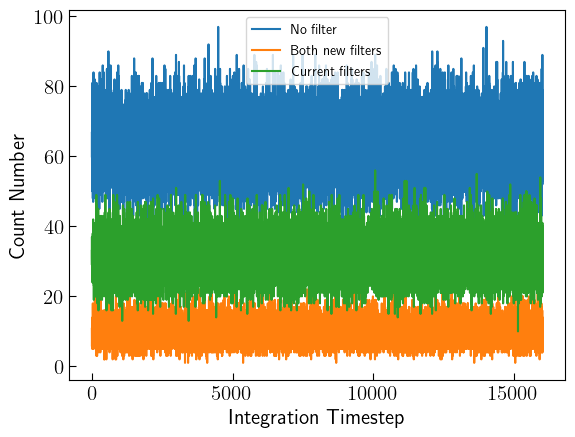

In [43]:
plt.plot(filterless_df['Ch 1'][0:-1], label = "No filter")
plt.plot(both_new_df['Ch 1'][0:len(filterless_df['Ch 1'])], label = "Both new filters")
plt.plot(curr_filter_df['Ch 1'][0:len(filterless_df['Ch 1'])], label = "Current filters")
plt.xlabel("Integration Timestep")
plt.ylabel("Count Number")
plt.legend()
plt.show()


In [44]:
CC_naked = sum(filterless_df['Ch 4'][:len(filterless_df['Ch 1'])])
CC_new_filter = sum(both_new_df['Ch 4'][:len(filterless_df['Ch 1'])])
CC_curr_filter = sum(curr_filter_df['Ch 4'][:len(filterless_df['Ch 1'])])

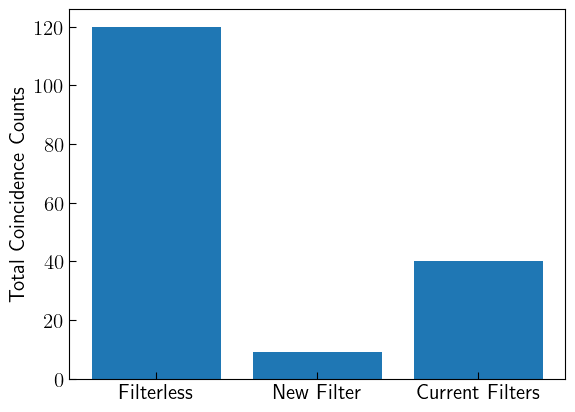

In [60]:
CC_data = {"Filterless": CC_naked, "New Filter": CC_new_filter, "Current Filters": CC_curr_filter}
labels = list(CC_data.keys())
coincidences = list(CC_data.values())
plt.bar(labels, coincidences)
plt.ylabel("Total Coincidence Counts")
plt.show()

In [46]:
nofilter_ch1_counts = np.sum(filterless_ch1)
oldfilter_ch1_counts = np.sum(curr_filter_ch1)
newfilter_ch1_counts = np.sum(both_new_ch1)

No filter:  0.6454973216130644
Old filter:  0.6703532448633587
New filter:  0.764477804402354


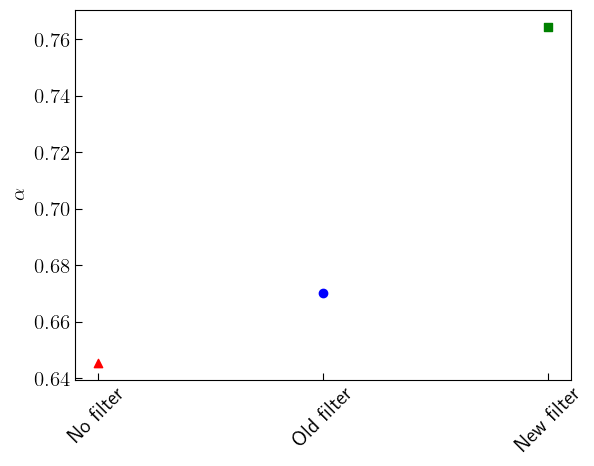

In [69]:
alpha_nofilter = get_alpha(0.00125, 
                            filterless_df['Ch 1'], 
                            filterless_df['Ch 2'], 
                            filterless_df['Ch 4'])
alpha_oldfilter = get_alpha(0.00125, 
                            curr_filter_df['Ch 1'], 
                            curr_filter_df['Ch 2'], 
                            curr_filter_df['Ch 4'])
alpha_newfilter = get_alpha(0.00125,
                            both_new_df['Ch 1'], 
                            both_new_df['Ch 2'], 
                            both_new_df['Ch 4'])
print("No filter: ", alpha_nofilter)
print("Old filter: ", alpha_oldfilter)
print("New filter: ", alpha_newfilter)

plt.scatter(["No filter"], alpha_nofilter, color = 'red', marker = '^')
plt.scatter(["Old filter"], alpha_oldfilter, color = 'blue', marker = 'o')
plt.scatter(["New filter"], alpha_newfilter, color = 'green', marker = 's')
plt.xticks(rotation=45)
plt.ylabel("$\\alpha$")
plt.show()


### Laser Variance

In [97]:
laser_split_nofilter = np.array_split(filterless_df, 10)
laser_split_oldfilter = np.array_split(curr_filter_df, 10)
laser_split_newfilter = np.array_split(both_new_df, 10)

l_nofilt_alpha = []
l_currfilt_alpha = []
l_newfilt_alpha = []

for nodf in laser_split_nofilter:
    no_alpha_val = get_alpha(0.00125, 
                        nodf['Ch 1'], 
                        nodf['Ch 2'], 
                        nodf['Ch 4'])
    l_nofilt_alpha.append(no_alpha_val)

for currdf in laser_split_oldfilter:
    curr_alpha_val = get_alpha(0.00125, 
                        currdf['Ch 1'], 
                        currdf['Ch 2'], 
                        currdf['Ch 4'])
    l_currfilt_alpha.append(curr_alpha_val)

for newdf in laser_split_newfilter:
    new_alpha_val = get_alpha(0.00125, 
                        newdf['Ch 1'], 
                        newdf['Ch 2'], 
                        newdf['Ch 4'])
    l_newfilt_alpha.append(new_alpha_val)

Text(0, 0.5, '$\\alpha$')

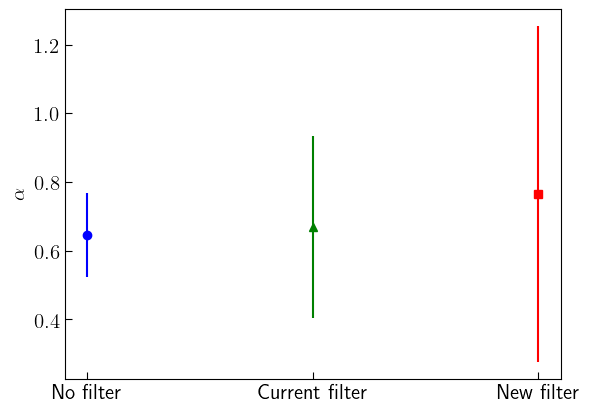

In [98]:
nofilt_alpha_mean = np.mean(l_nofilt_alpha)
nofilt_alpha_std = np.std(l_nofilt_alpha)
currfilt_alpha_mean = np.mean(l_currfilt_alpha)
currfilt_alpha_std = np.std(l_currfilt_alpha)
newfilt_alpha_mean = np.mean(l_newfilt_alpha)
newfilt_alpha_std = np.std(l_newfilt_alpha)

plt.errorbar(["No filter"], nofilt_alpha_mean, nofilt_alpha_std, color = 'blue', fmt = 'o')
plt.errorbar(["Current filter"], currfilt_alpha_mean, currfilt_alpha_std, color = 'green', fmt = '^')
plt.errorbar(["New filter"], newfilt_alpha_mean, newfilt_alpha_std, color = 'red', fmt = 's')

plt.ylabel("$\\alpha$")

## TORCH TESTS

In [99]:
torch_no_filter = data_dir + "torch_test\\naked"
torch_old_filter = data_dir + "torch_test\\old_filters_both"
torch_new_filter = data_dir + "torch_test\\new_filters_both"

In [100]:
t_no_filt, _ = CD.clean_csv(torch_no_filter)
t_old_filt, _ = CD.clean_csv(torch_old_filter)
t_new_filt, _ = CD.clean_csv(torch_new_filter)

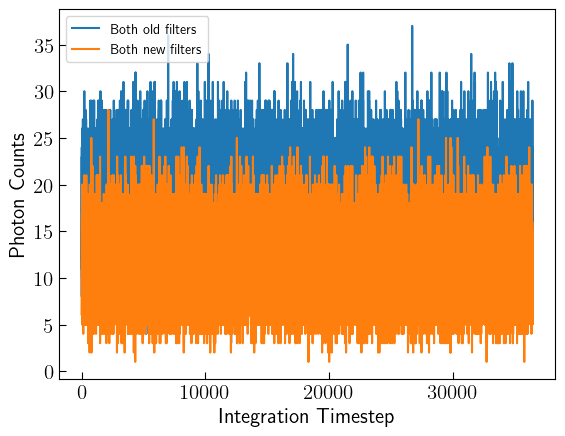

In [53]:
# plt.plot(t_no_filt['Ch 1'][:len(t_old_filt['Ch 1'])], label = "No filter")
plt.plot(t_old_filt['Ch 1'][:len(t_old_filt['Ch 1'])], label = "Both old filters")
plt.plot(t_new_filt['Ch 1'][:len(t_old_filt['Ch 1'])], label = "Both new filters")
plt.legend()
plt.xlabel("Integration Timestep")
plt.ylabel("Photon Counts")
plt.show()


In [54]:
t_CC_naked = sum(t_no_filt['Ch 4'][:len(t_old_filt['Ch 1'])])
t_CC_new_filter = sum(t_new_filt['Ch 4'][:len(t_old_filt['Ch 1'])])
t_CC_curr_filter = sum(t_old_filt['Ch 4'][:len(t_old_filt['Ch 1'])])

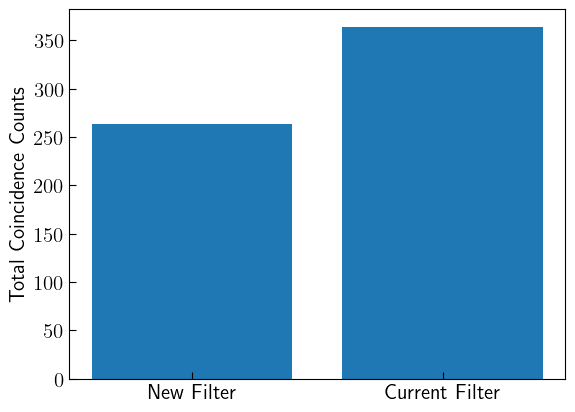

In [59]:
t_CC_data = {"New Filter": t_CC_new_filter, "Current Filter": t_CC_curr_filter}
t_labels = list(t_CC_data.keys())
t_coincidences = list(t_CC_data.values())
plt.bar(t_labels, t_coincidences)
plt.ylabel("Total Coincidence Counts")
plt.show()

No filter:  0.6548303578932413
Old filter:  0.6387590634104161
New filter:  0.6771205063032212


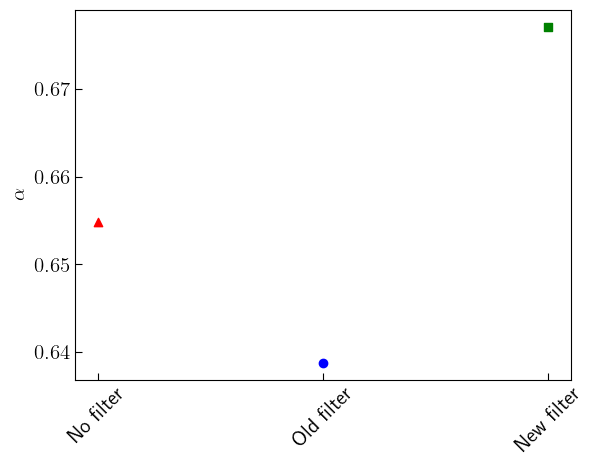

In [70]:
t_alpha_nofilter = get_alpha(0.00125, 
                            t_no_filt['Ch 1'], 
                            t_no_filt['Ch 2'], 
                            t_no_filt['Ch 4'])
t_alpha_oldfilter = get_alpha(0.00125, 
                            t_old_filt['Ch 1'], 
                            t_old_filt['Ch 2'], 
                            t_old_filt['Ch 4'])
t_alpha_newfilter = get_alpha(0.00125,
                            t_new_filt['Ch 1'], 
                            t_new_filt['Ch 2'], 
                            t_new_filt['Ch 4'])
print("No filter: ", t_alpha_nofilter)
print("Old filter: ", t_alpha_oldfilter)
print("New filter: ", t_alpha_newfilter)

plt.scatter(["No filter"], t_alpha_nofilter, color = 'red', marker = '^')
plt.scatter(["Old filter"], t_alpha_oldfilter, color = 'blue', marker = 'o')
plt.scatter(["New filter"], t_alpha_newfilter, color = 'green', marker = 's')
plt.xticks(rotation=45)
plt.ylabel("$\\alpha$")
plt.show()

### Torch Variance

In [101]:
torch_split_nofilter = np.array_split(t_no_filt, 10)
torch_split_oldfilter = np.array_split(t_old_filt, 10)
torch_split_newfilter = np.array_split(t_new_filt, 10)

t_nofilt_alpha = []
t_currfilt_alpha = []
t_newfilt_alpha = []

for nodf in torch_split_nofilter:
    no_alpha_val = get_alpha(0.00125, 
                        nodf['Ch 1'], 
                        nodf['Ch 2'], 
                        nodf['Ch 4'])
    t_nofilt_alpha.append(no_alpha_val)

for currdf in torch_split_oldfilter:
    curr_alpha_val = get_alpha(0.00125, 
                        currdf['Ch 1'], 
                        currdf['Ch 2'], 
                        currdf['Ch 4'])
    t_currfilt_alpha.append(curr_alpha_val)

for newdf in torch_split_newfilter:
    new_alpha_val = get_alpha(0.00125, 
                        newdf['Ch 1'], 
                        newdf['Ch 2'], 
                        newdf['Ch 4'])
    t_newfilt_alpha.append(new_alpha_val)

Text(0, 0.5, '$\\alpha$')

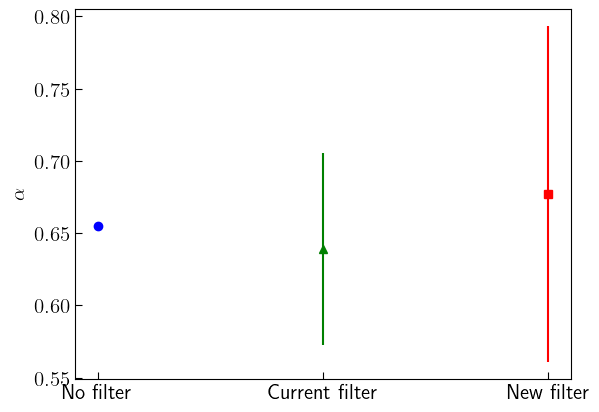

In [102]:
t_nofilt_alpha_mean = np.mean(t_nofilt_alpha)
t_nofilt_alpha_std = np.std(t_nofilt_alpha)
t_currfilt_alpha_mean = np.mean(t_currfilt_alpha)
t_currfilt_alpha_std = np.std(t_currfilt_alpha)
t_newfilt_alpha_mean = np.mean(t_newfilt_alpha)
t_newfilt_alpha_std = np.std(t_newfilt_alpha)

plt.errorbar(["No filter"], t_nofilt_alpha_mean, t_nofilt_alpha_std, color = 'blue', fmt = 'o')
plt.errorbar(["Current filter"], t_currfilt_alpha_mean, t_currfilt_alpha_std, color = 'green', fmt = '^')
plt.errorbar(["New filter"], t_newfilt_alpha_mean, t_newfilt_alpha_std, color = 'red', fmt = 's')

plt.ylabel("$\\alpha$")

In [103]:
IR_no_filter = data_dir + "IR_LED\\curr+curr"
IR_old_filter = data_dir + "IR_LED\\curr+curr_2"
IR_new_filter = data_dir + "IR_LED\\curr+new"

In [104]:
IR_no_filt, _ = CD.clean_csv(IR_no_filter)
IR_old_filt, _ = CD.clean_csv(IR_old_filter)
IR_new_filt, _ = CD.clean_csv(IR_new_filter)

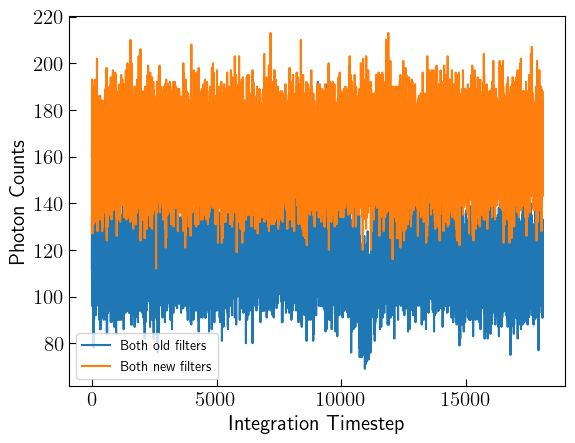

In [105]:
# plt.plot(t_no_filt['Ch 1'][:len(IR_old_filt['Ch 1'])], label = "No filter")
plt.plot(IR_old_filt['Ch 1'][:len(IR_old_filt['Ch 1'])], label = "Both old filters")
plt.plot(IR_new_filt['Ch 1'][:len(IR_old_filt['Ch 1'])], label = "Both new filters")
plt.legend()
plt.xlabel("Integration Timestep")
plt.ylabel("Photon Counts")
plt.show()


In [106]:
IR_CC_new_filter = sum(IR_new_filt['Ch 4'][:len(IR_old_filt['Ch 1'])])
IR_CC_curr_filter = sum(IR_old_filt['Ch 4'][:len(IR_old_filt['Ch 1'])])
IR_CC_naked = sum(IR_no_filt['Ch 4'][:len(IR_old_filt['Ch 1'])])

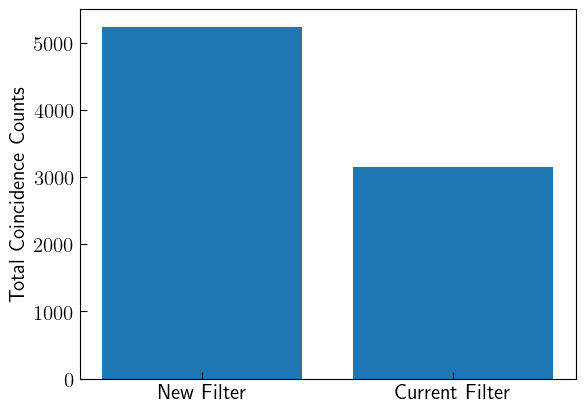

In [107]:
IR_CC_data = {"New Filter": IR_CC_new_filter, "Current Filter": IR_CC_curr_filter}
IR_labels = list(IR_CC_data.keys())
IR_coincidences = list(IR_CC_data.values())
plt.bar(IR_labels, IR_coincidences)
plt.ylabel("Total Coincidence Counts")
plt.show()

No filter:  0.6447534537189106
Old filter:  0.666285346279556
New filter:  0.6378502874800921


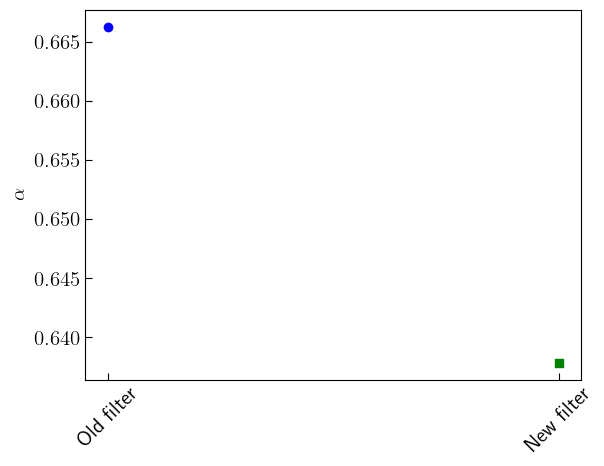

In [108]:
IR_alpha_nofilter = get_alpha(0.00125, 
                            IR_no_filt['Ch 1'], 
                            IR_no_filt['Ch 2'], 
                            IR_no_filt['Ch 4'])
IR_alpha_oldfilter = get_alpha(0.00125, 
                            IR_old_filt['Ch 1'], 
                            IR_old_filt['Ch 2'], 
                            IR_old_filt['Ch 4'])
IR_alpha_newfilter = get_alpha(0.00125,
                            IR_new_filt['Ch 1'], 
                            IR_new_filt['Ch 2'], 
                            IR_new_filt['Ch 4'])
print("No filter: ", IR_alpha_nofilter)
print("Old filter: ", IR_alpha_oldfilter)
print("New filter: ", IR_alpha_newfilter)

# plt.scatter(["No filter"], IR_alpha_nofilter, color = 'red', marker = '^')
plt.scatter(["Old filter"], IR_alpha_oldfilter, color = 'blue', marker = 'o')
plt.scatter(["New filter"], IR_alpha_newfilter, color = 'green', marker = 's')
plt.xticks(rotation=45)
plt.ylabel("$\\alpha$")
plt.show()

### IR Variance

In [113]:
IR_split_nofilter = np.array_split(IR_no_filt, 10)
IR_split_oldfilter = np.array_split(IR_old_filt, 10)
IR_split_newfilter = np.array_split(IR_new_filt, 10)

IR_nofilt_alpha = []
IR_currfilt_alpha = []
IR_newfilt_alpha = []

for nodf in IR_split_nofilter:
    no_alpha_val = get_alpha(0.00125, 
                        nodf['Ch 1'], 
                        nodf['Ch 2'], 
                        nodf['Ch 4'])
    IR_nofilt_alpha.append(no_alpha_val)

for currdf in IR_split_oldfilter:
    curr_alpha_val = get_alpha(0.00125, 
                        currdf['Ch 1'], 
                        currdf['Ch 2'], 
                        currdf['Ch 4'])
    IR_currfilt_alpha.append(curr_alpha_val)

for newdf in IR_split_newfilter:
    new_alpha_val = get_alpha(0.00125, 
                        newdf['Ch 1'], 
                        newdf['Ch 2'], 
                        newdf['Ch 4'])
    IR_newfilt_alpha.append(new_alpha_val)

Text(0, 0.5, '$\\alpha$')

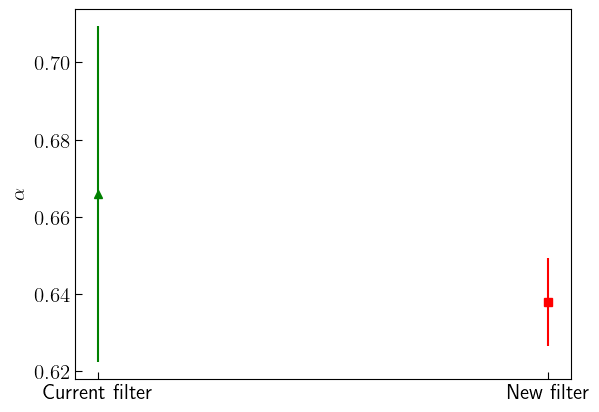

In [114]:
IR_nofilt_alpha_mean = np.mean(IR_nofilt_alpha)
IR_nofilt_alpha_std = np.std(IR_nofilt_alpha)
IR_currfilt_alpha_mean = np.mean(IR_currfilt_alpha)
IR_currfilt_alpha_std = np.std(IR_currfilt_alpha)
IR_newfilt_alpha_mean = np.mean(IR_newfilt_alpha)
IR_newfilt_alpha_std = np.std(IR_newfilt_alpha)

# plt.errorbar(["No filter"], IR_nofilt_alpha_mean, IR_nofilt_alpha_std, color = 'blue', fmt = 'o')
plt.errorbar(["Current filter"], IR_currfilt_alpha_mean, IR_currfilt_alpha_std, color = 'green', fmt = '^')
plt.errorbar(["New filter"], IR_newfilt_alpha_mean, IR_newfilt_alpha_std, color = 'red', fmt = 's')

plt.ylabel("$\\alpha$")